In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# seabornが提供するデータセット一覧を表示
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [42]:
# データセットの読み込み
df = sns.load_dataset('titanic')

In [10]:
# dfの先頭を確認
df.head()

# 行と列数を確認
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# 重複カラムを処理する

In [12]:
# 重複を確認
df['survived'].unique(), df['alive'].unique()

(array([0, 1]), array(['no', 'yes'], dtype=object))

In [32]:
# これらは1:1で対応している
df[['survived', 'alive']].value_counts()
df[['pclass', 'class']].value_counts()
df[['embarked', 'embark_town']].value_counts()
df[['who', 'adult_male']].value_counts()

# データを眺めていると気づきやすいのでまずはデータを眺める

who    adult_male
man    True          537
woman  False         271
child  False          83
Name: count, dtype: int64

In [31]:
# sibspとparchが共に0の人はAloneであるかを確認
df[(df['sibsp'] == 0) & (df['parch'] == 0)]['alone'].unique() # unipe値がTrueしかないことを確認

array([ True])

In [34]:
df[(df['sibsp'] != 0) | (df['parch'] != 0)]['alone'].unique() # unipe値がfalseしかないことを確認

array([False])

In [35]:
# df_new = df

In [43]:
# データの持つ意味が重複する行を削除
df.drop(['alive', 'class', 'adult_male', 'embark_town', 'alone'], axis=1, inplace=True)

In [44]:
df.shape

(891, 10)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   who       891 non-null    object  
 9   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 64.0+ KB


# 欠損値の補間
 - **不明な乗船地を予測する**

In [47]:
df.isnull().sum()

# deckの欠損値が多いので処理する

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
deck        688
dtype: int64

In [50]:
# df['deck'].value_counts() # sortなし
df['deck'].value_counts().sort_index() # indexでソート

# ***** メモ *****
# deckは船の上の滞在場所を表す

deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
Name: count, dtype: int64

In [52]:
# deckとsurvovedの関係を見てみる

df.groupby('deck')['survived'].describe()

/var/folders/7h/pvrr2skj31l3k_w_t4bj4q280000gn/T/ipykernel_49267/2486517523.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('deck')['survived'].describe()


,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,0.466667,0.516398,0.0,0.00,0.0,1.0,1.0
B,47.0,0.744681,0.440755,0.0,0.50,1.0,1.0,1.0
C,59.0,0.593220,0.495450,0.0,0.00,1.0,1.0,1.0
D,33.0,0.757576,0.435194,0.0,1.00,1.0,1.0,1.0
E,32.0,0.750000,0.439941,0.0,0.75,1.0,1.0,1.0
F,13.0,0.615385,0.506370,0.0,0.00,1.0,1.0,1.0
G,4.0,0.500000,0.577350,0.0,0.00,0.5,1.0,1.0


In [53]:
# deckは欠損値が多いので、今回は一旦削除
df.drop('deck', axis=1, inplace=True)

In [57]:
# df['embarked'].isnull()
df[df['embarked'].isnull()] # embarked = NaNのdfを抽出

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
61,1,1,female,38.0,0,0,80.0,NaN,woman
829,1,1,female,62.0,0,0,80.0,NaN,woman


In [58]:
# embarkedとsurvovedの関係を見てみる
df.groupby('embarked')['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,168.0,0.553571,0.498608,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,644.0,0.336957,0.473037,0.0,0.0,0.0,1.0,1.0


In [61]:
# embarked = NaNがage以外同じ特徴量なので、他にもないか確認
# df[(df['survived'] == 1) & (df['pclass'] == 1) & (df['sex'] == 'female') & (df['fare'] == 80) & (df['sibsp'] == 0) & (df['parch'] == 0)]
df[(df['pclass'] == 1) & (df['sex'] == 'female') & (df['fare'] == 80) & (df['sibsp'] == 0) & (df['parch'] == 0)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
61,1,1,female,38.0,0,0,80.0,NaN,woman
829,1,1,female,62.0,0,0,80.0,NaN,woman


In [68]:
# 乗船値がNanのデータの他のデータと同じ条件を使って予測してみる

# クラスが1で、女性で、1人の乗客という条件で絞り込む
vc1 = df[(df['pclass'] == 1) & (df['sex'] == 'female') & (df['sibsp'] == 0) & (df['parch'] == 0)]['embarked'].value_counts()

In [69]:
# 元々の乗船地はどうだったか確認
df['embarked'].value_counts()

# 全体の人数は S > C だが、先ほどデータは C > S だったので、
# 「SよりもCに似たような乗客が多いことがわかる」(「可能性が高い」ではない)

# C, Sのみ抽出して確認
vc2 = df['embarked'].value_counts()[[1, 0]] # Cはindex=1, Sはindex=0

/var/folders/7h/pvrr2skj31l3k_w_t4bj4q280000gn/T/ipykernel_49267/184803206.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vc2 = df['embarked'].value_counts()[[1, 0]] # Cはindex=1, Sはindex=0


In [71]:
# 乗船地が不明の乗客と似た乗客の割合
vc1 / vc2
# vc1 : 乗船地が不明の乗客と似た乗客
# vc2 : 全体

embarked
C    0.107143
S    0.021739
Name: count, dtype: float64

In [72]:
# 年齢での傾向も確認(女性に絞って確認)
df[df['sex'] == 'female'].groupby('embarked')['age'].describe()
# 得たい値はage
# - 女性のdfのうち、乗船値ごとの年齢の平均値などを表示

# -> SとCの間に特徴的な差は見られない

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,61.0,28.344262,15.770830,0.75,17.0,24.0,40.000,60.0
Q,12.0,24.291667,8.147667,15.00,17.5,21.5,30.875,39.0
S,186.0,27.771505,13.690703,1.00,19.0,27.0,36.000,63.0


In [73]:
# 乗船値のNaNはCで補間
# それぞれのindexに直接代入
df.loc[61, 'embarked'] = 'C'
df.loc[829, 'embarked'] = 'C'

In [74]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
who           0
dtype: int64

# 欠損した年齢について検討する

In [77]:
# df['age'].isnull() # .sum()

# age=NaNを含むdfを表示: df[条件...Trueを反映].head()
df[df['age'].isnull()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
5,0,3,male,NaN,0,0,8.4583,Q,man
17,1,2,male,NaN,0,0,13.0000,S,man
19,1,3,female,NaN,0,0,7.2250,C,woman
26,0,3,male,NaN,0,0,7.2250,C,man
28,1,3,female,NaN,0,0,7.8792,Q,woman


In [78]:
# 年齢と関係がありそうな性別を確認
df['who'].unique()

# man, woman, childの3種類ある

array(['man', 'woman', 'child'], dtype=object)

In [83]:
# ageが欠損しているデータの性別の内訳を確認
df[df['age'].isnull()]['who'].unique()

# メモ
# (df['who'] = df[:]['who'])
# df_new = df[df['age'].isnull()]
# とすると、
# df_new['who'].unique()と同じ処理をしている

# なので、df[][]の形は分かりにくい&行列のように見えるが、
# df[df['age'].isnull()] で条件付きのdfを指定していることになる

array(['man', 'woman'], dtype=object)

In [92]:
# childのmaxが15なので、欠損値は15よりも大きいことがわかる
df[df['who'] == 'child']['age'].max()

# ageが15よりも大きいデータをdf_adultとして作成
df_adult = df[15 < df['age']]

In [105]:
df_adult.sample(5) # ランダムにサンプリング

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
404,0,3,female,20.0,0,0,8.6625,S,woman
637,0,2,male,31.0,1,1,26.2500,S,man
378,0,3,male,20.0,0,0,4.0125,C,man
383,1,1,female,35.0,1,0,52.0000,S,woman
342,0,2,male,28.0,0,0,13.0000,S,man


In [107]:
# 年齢の分布を確認
df_adult['age'].max()

np.float64(80.0)

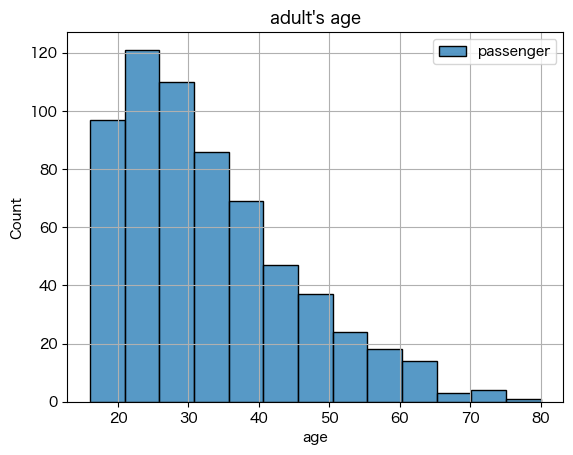

In [113]:
sns.histplot(data=df_adult, x='age', bins=13, label='passenger')
plt.title('adult\'s age')
plt.legend()
plt.grid()
plt.show()

# binsを13にしたのはおよそ5歳区切りにするため
# このヒストグラムでは、5歳幅でどのくらいの人数がいるかを確認することができる

# (80-15)/13=5 ... 年齢の幅/グラフの本数

In [115]:
# 大人データの平均年齢
df_adult['age'].mean()

np.float64(32.76782884310618)

/Users/ken/opt/anaconda3/envs/kaggle_DNN/lib/python3.1/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ken/opt/anaconda3/envs/kaggle_DNN/lib/python3.1/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ken/opt/anaconda3/envs/kaggle_DNN/lib/python3.1/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 40802 (\N{CJK UNIFIED IDEOGRAPH-9F62}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ken/opt/anaconda3/envs/kaggle_DNN/lib/python3.1/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ken/opt/anaconda3/envs/kaggle_DNN/lib/python3.1/site-packages

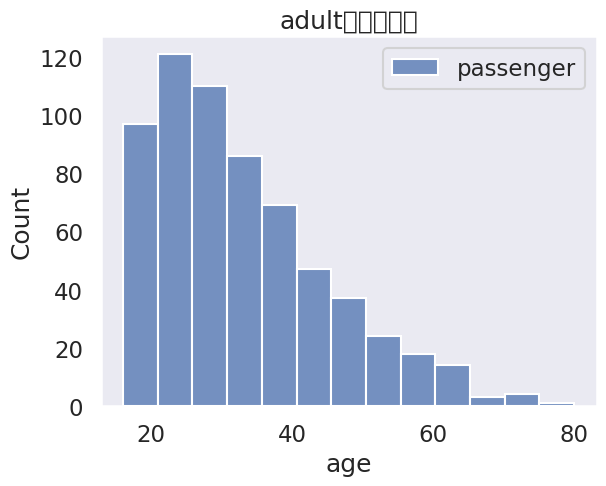

In [120]:
# 日本語に対応させる設定
# sns.set_theme(font='MS GOTHIC', context='talk', style='darkgrid')
sns.set_theme(font='', context='talk', style='darkgrid')
# context: paper, notebook, talk, poster
# style: dark, darkgrid, white, whitegrid, ticks


sns.histplot(data=df_adult, x='age', bins=13, label='passenger')
plt.title('adultの年齢分布')
plt.legend()
plt.grid()
plt.show()

# 年齢とチャットクラス、性別間の相関

ageとpclassの関係

In [121]:
df_adult.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
0,0,3,male,22.0,1,0,7.2500,S,man
1,1,1,female,38.0,1,0,71.2833,C,woman
2,1,3,female,26.0,0,0,7.9250,S,woman


pclassごとのfareを確認

In [123]:
df.groupby('pclass')['fare'].describe()

# mean, 50%(中央値)を見る
# - pclassが異なると、fareの平均や中央値の値も大きく異なることがわかるので、何らかの相関関係があると思われる

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


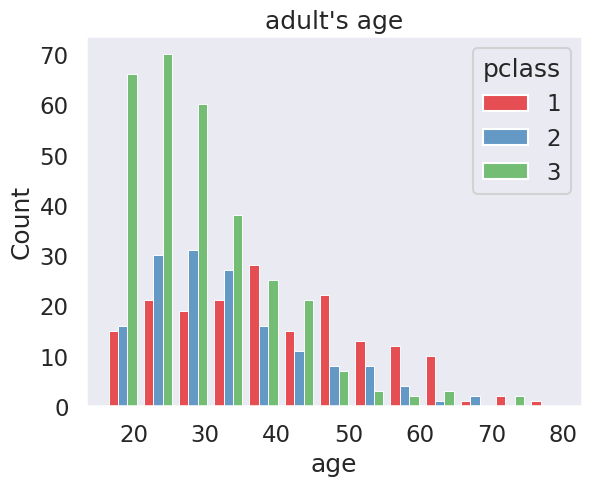

In [127]:
# hueは色相という意味を表し、重ねて表示できる
# 別々のバーにしたい場合は、multipleをdodgeにする
# shrinkでバーの近さを変更できる
# sns.histplot(data=df_adult, x='age', bins=13, hue='pclass', palette='Set1')
sns.histplot(data=df_adult, x='age', bins=13, hue='pclass', palette='Set1', multiple='dodge', shrink=0.8)
plt.title('adult\'s age')
plt.grid()
plt.show()

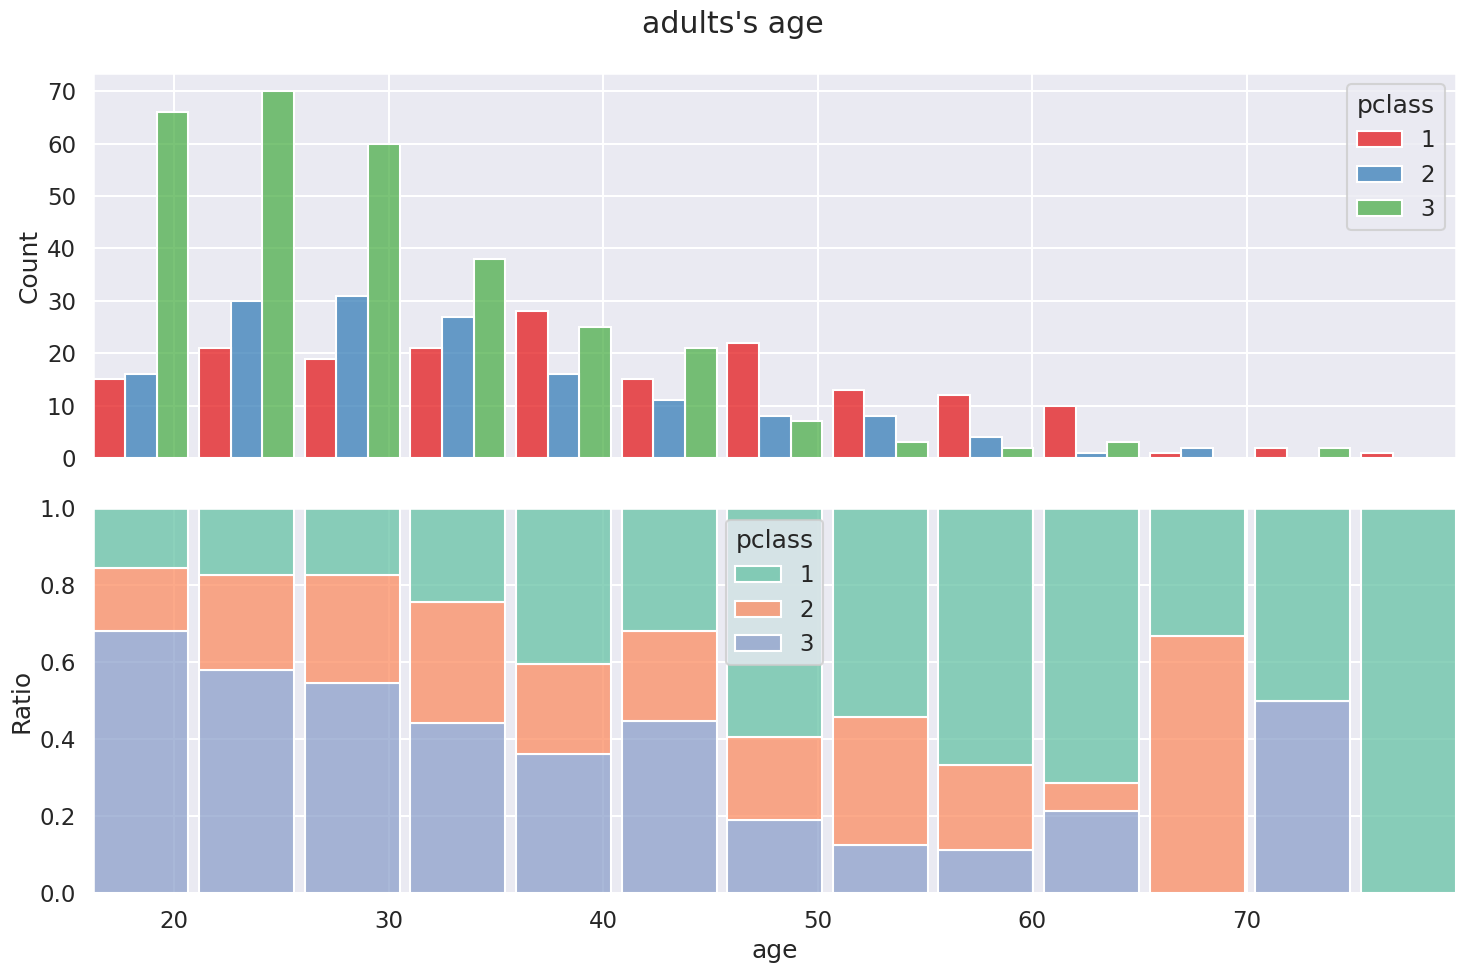

In [128]:
# 詳細は後のレクチャーで
fig, axes = plt.subplots(2, 1, figsize=(15, 10), tight_layout=True, sharex=True)
sns.histplot(data=df_adult, x='age', bins=13, hue='pclass', multiple='dodge', palette='Set1', shrink=0.9, ax=axes[0])
sns.histplot(data=df_adult, x='age', bins=13, hue='pclass', multiple='fill', palette='Set2', shrink=0.9, ax=axes[1])
axes[1].set_ylabel('Ratio')
axes[0]

fig.suptitle("adults\'s age")

plt.show()

ageとsexの関係

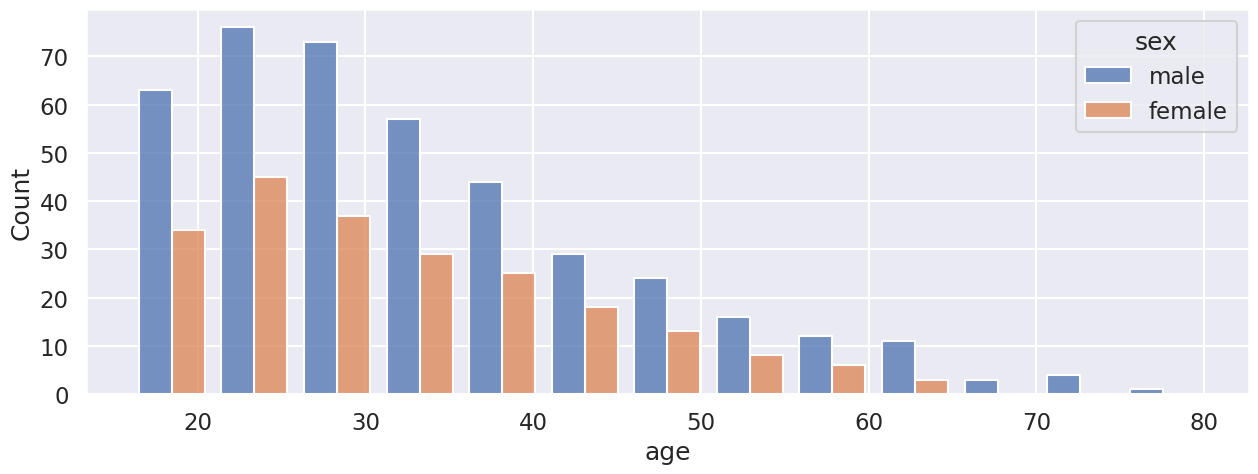

In [131]:
# 詳細は後のレクチャーで
plt.figure(figsize=(15,5))
sns.histplot(data=df_adult, x='age', bins=13, hue='sex', multiple='dodge', shrink=0.8)
plt.show()

# 相関関係と相関係数

In [133]:
# df_adult.head()

In [138]:
# 相関関係: correlation
# df_adult.corr()
# df_adult.corr()
# データフレームに数値以外のデータ（例えば文字列）が含まれているためにエラーが発生

df_adult.corr(numeric_only=True) # 数値データのみを対象に相関を計算するように指定することでエラーを回避

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.390467,0.010352,0.088154,0.074216,0.296918
pclass,-0.390467,1.000000,-0.355523,-0.111805,-0.024458,-0.552295
age,0.010352,-0.355523,1.000000,-0.050841,0.037404,0.110403
sibsp,0.088154,-0.111805,-0.050841,1.000000,0.280791,0.221493
parch,0.074216,-0.024458,0.037404,0.280791,1.000000,0.217429
fare,0.296918,-0.552295,0.110403,0.221493,0.217429,1.000000


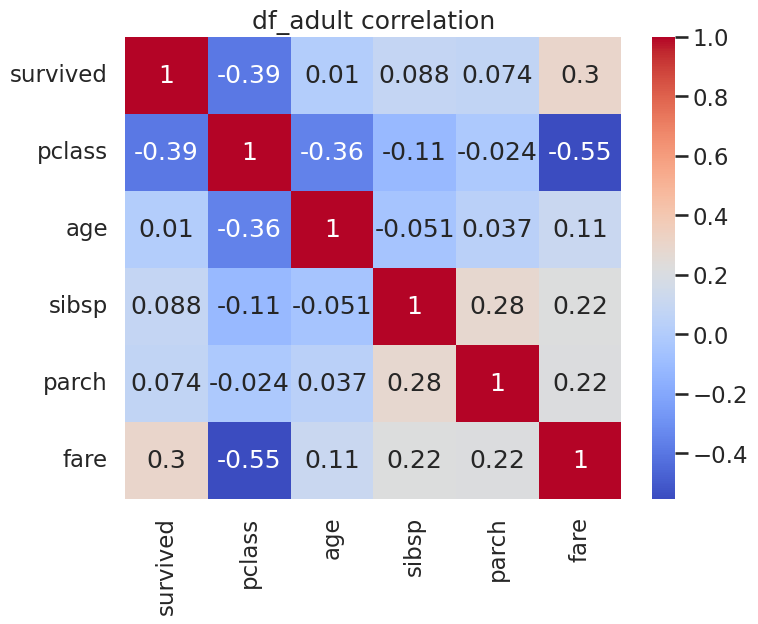

In [144]:
# 詳細は後のレクチャーで
plt.figure(figsize=(8, 6))
sns.heatmap(df_adult.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('df_adult correlation')
plt.show()

NaNを持つ全てのレコードを削除(行)

In [152]:
df.dropna(axis=0, inplace=True)
# df.info()

In [151]:
df.shape

(714, 9)

In [153]:
df.to_csv('titanic_non_null.csv', index=False)

# CATプロット(カテゴリーごとに可視化)とストリッププロット

In [154]:
df.groupby('embarked')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,132.0,31.105455,15.566968,0.42,21.75,29.0,40.0,71.0
Q,28.0,28.089286,16.915396,2.00,17.50,27.0,34.5,70.5
S,554.0,29.445397,14.143192,0.67,21.00,28.0,38.0,80.0


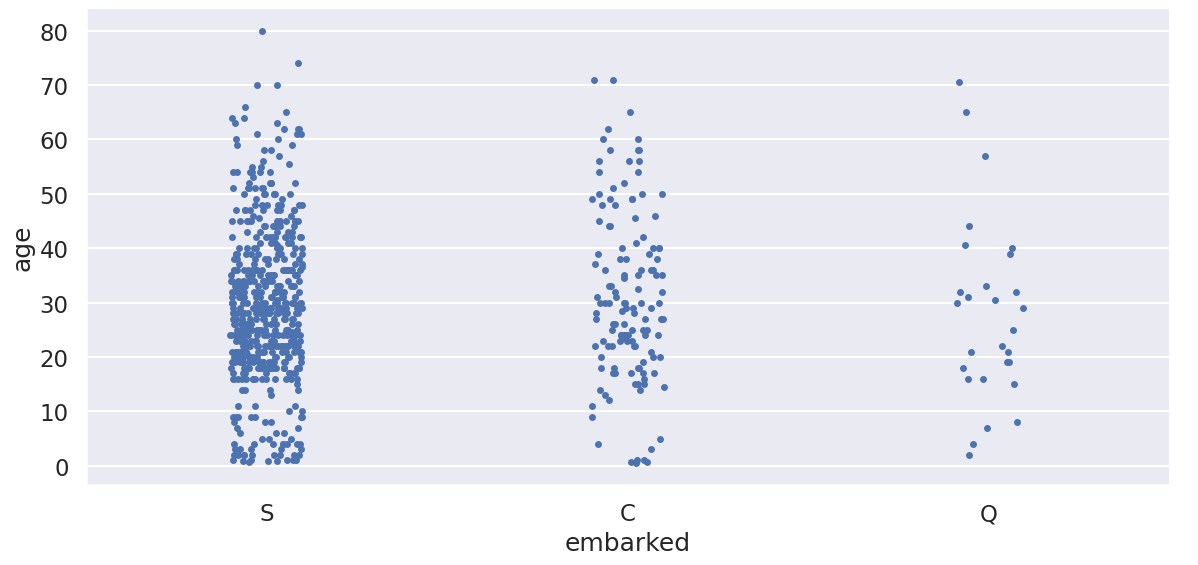

In [155]:
sns.catplot(data=df, x='embarked', y='age', height=6, aspect=2)
plt.show()
#  kind : 'strip'(default), 'swarm', 'box', 'violin', 'boxen', 'point', 'bar'

# catplotはカテゴリカルプロットを包括するようなものだと言ってよいと思います。
# 特徴は行・列にカテゴリーを加えたグリッド型の表現ができることです

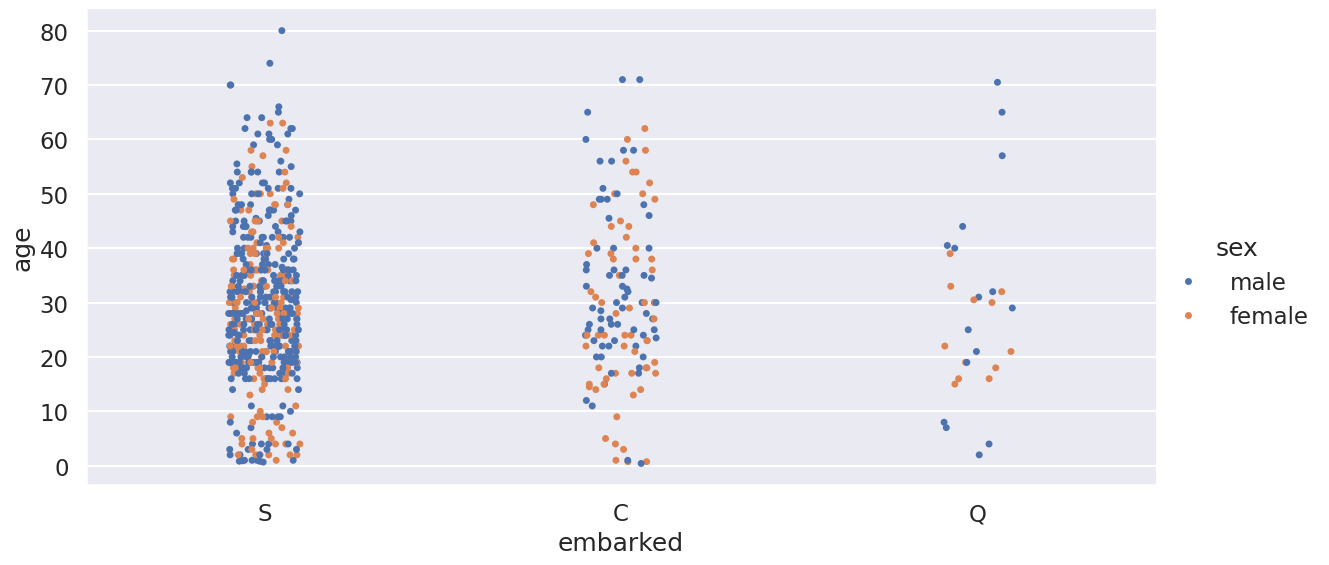

In [156]:
sns.catplot(data=df, x='embarked', y='age', hue='sex', height=6, aspect=2)
plt.show()
# hue:色相
# グリッド型を使えるものはheight,aspectでグラフのサイズを変更します

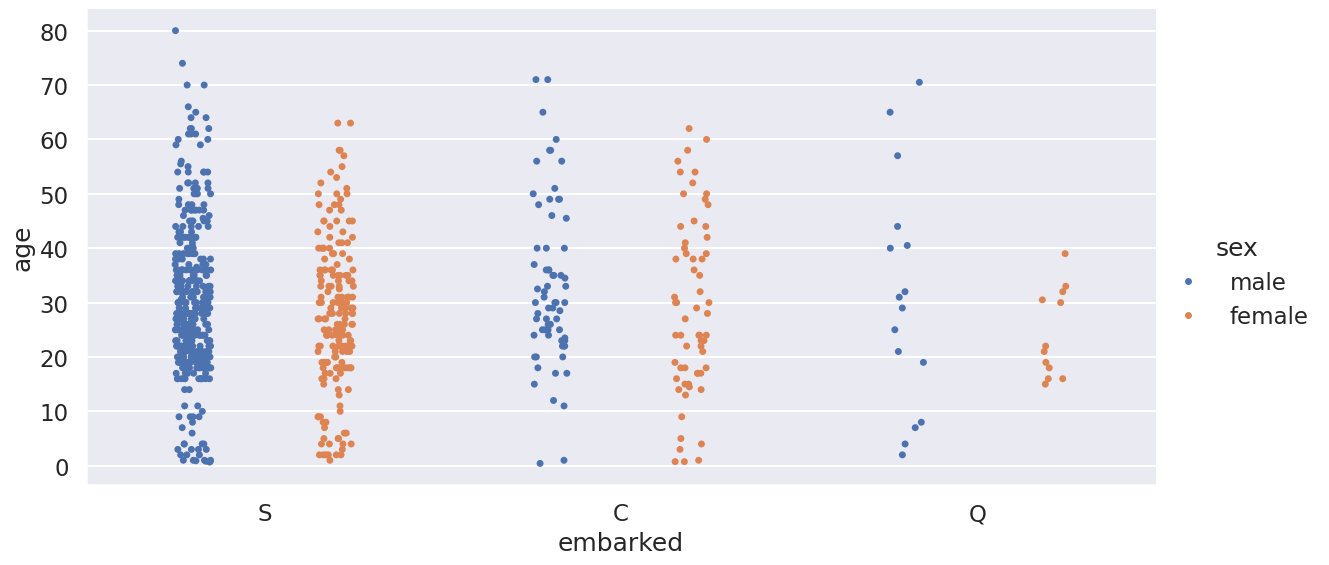

In [157]:
sns.catplot(data=df, x='embarked', y='age', hue='sex', dodge=True, height=6, aspect=2)
plt.show()
# hueで重なるものはdodge=Trueで分離できます

/var/folders/7h/pvrr2skj31l3k_w_t4bj4q280000gn/T/ipykernel_49267/4190489558.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', palette='Greens')


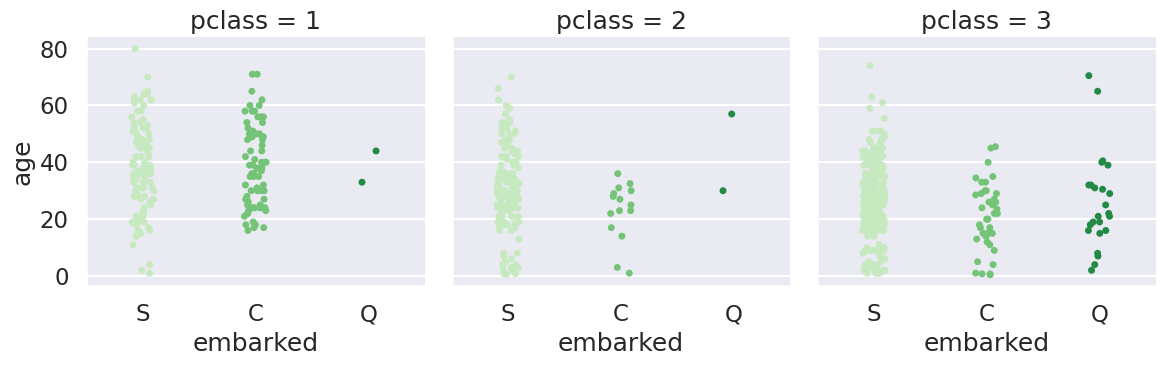

In [160]:
sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', palette='Greens')
plt.show()
# カラムを指定しました

/var/folders/7h/pvrr2skj31l3k_w_t4bj4q280000gn/T/ipykernel_49267/4239429147.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', row='survived', palette='Reds')


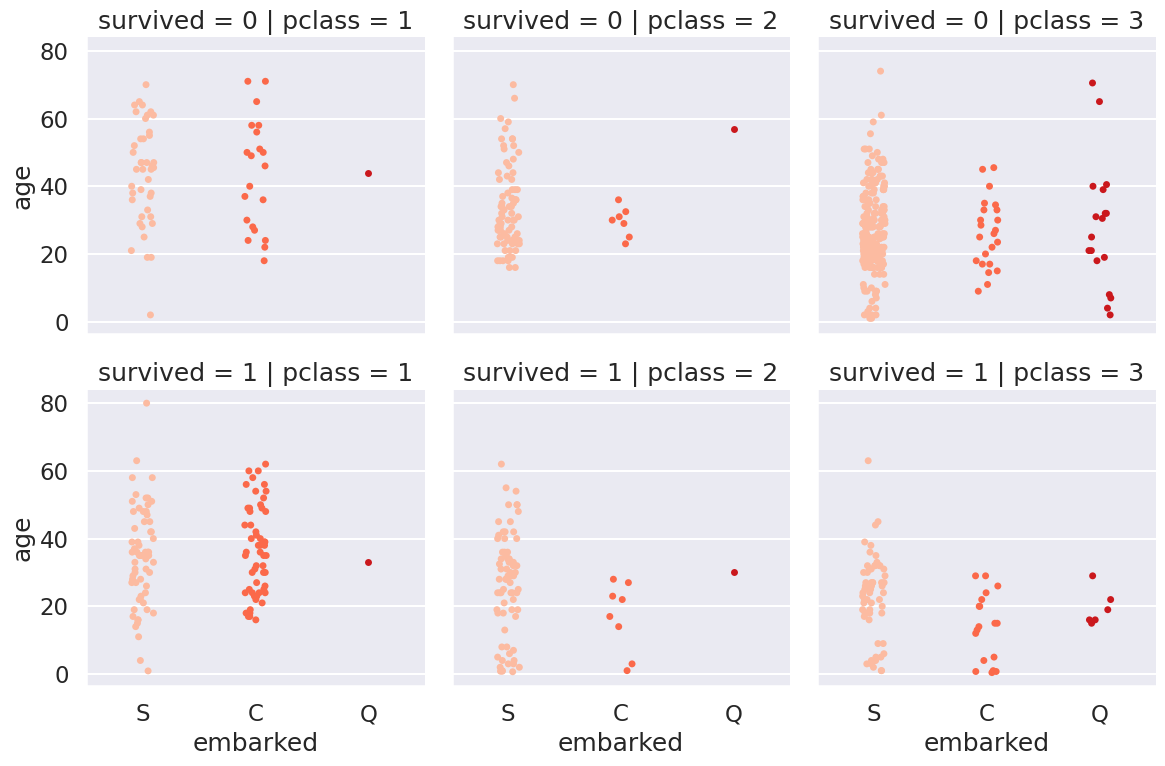

In [161]:
sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', row='survived', palette='Reds')
plt.show()
# ローも加えています

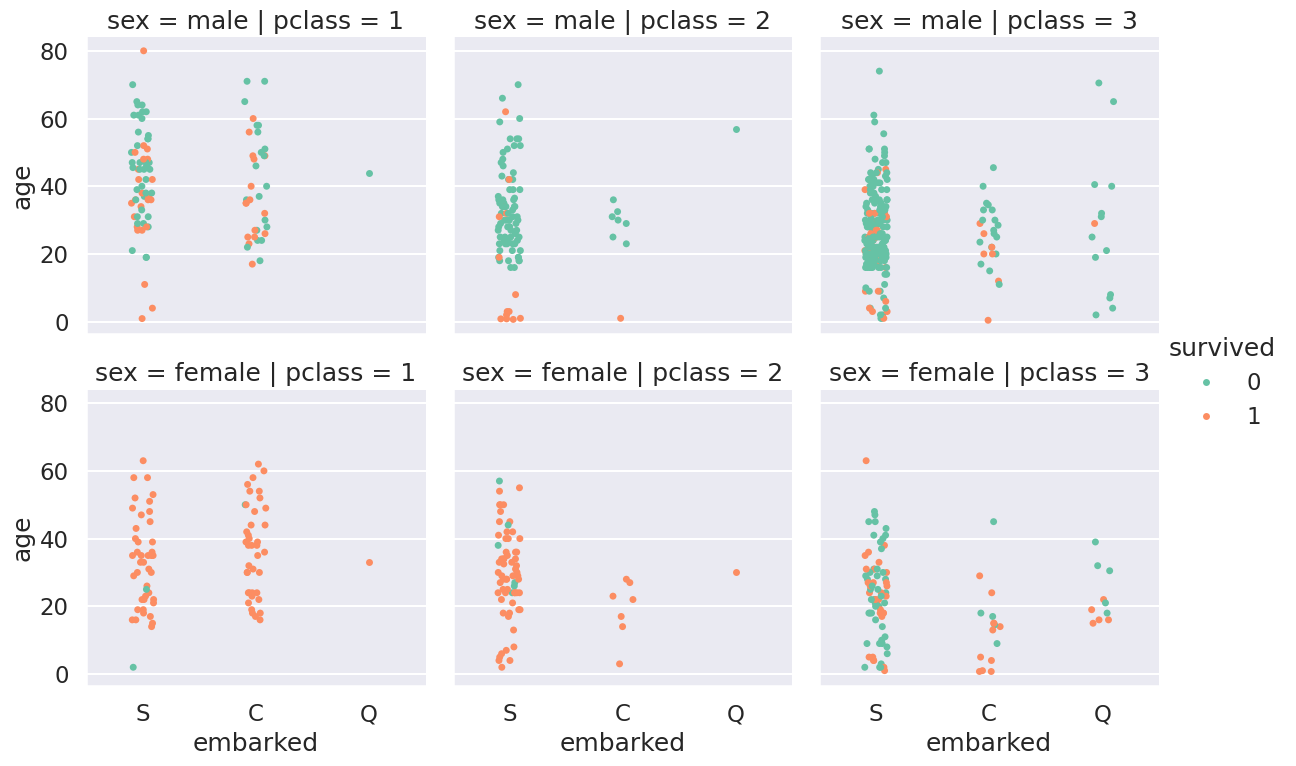

In [162]:
# row, colを設定
sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', row='sex', hue='survived', palette='Set2')
plt.show()
# hueにsurvivedを設定し、合計４つのカテゴリ、ひとつの数値データを扱っています


# *********************************
# 女性は生存率が高そうだということがわかる
# *********************************

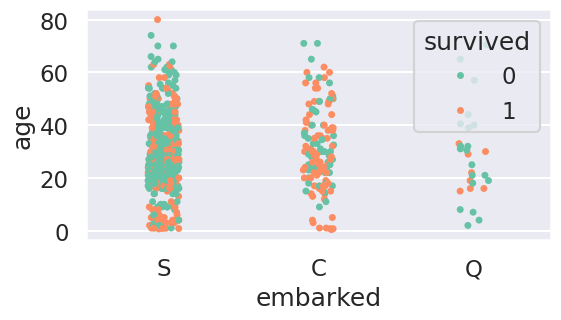

In [164]:
plt.figure(figsize=(6, 3))
sns.stripplot(data=df, x='embarked', y='age', hue='survived', palette='Set2')
plt.show()
# 単独の場合はstripplotを選択 (複数の行列を扱う場合は、catplotという認識でOK)
# グラフのサイズ変更はfigsizeで

カウントプロット

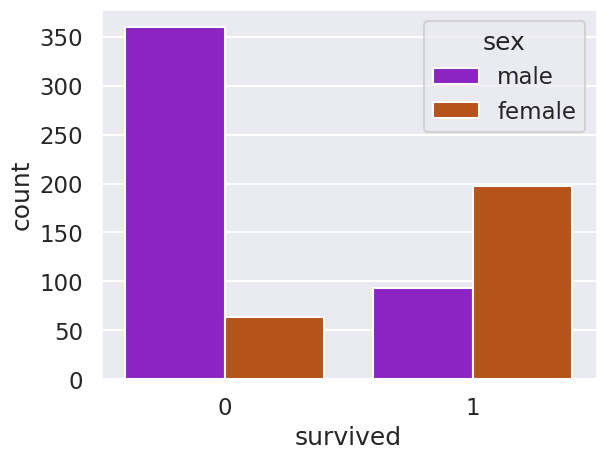

In [168]:
# sns.countplot(data=df, x='survived')
sns.countplot(data=df, x='survived', hue='sex', palette='gnuplot')
plt.show()

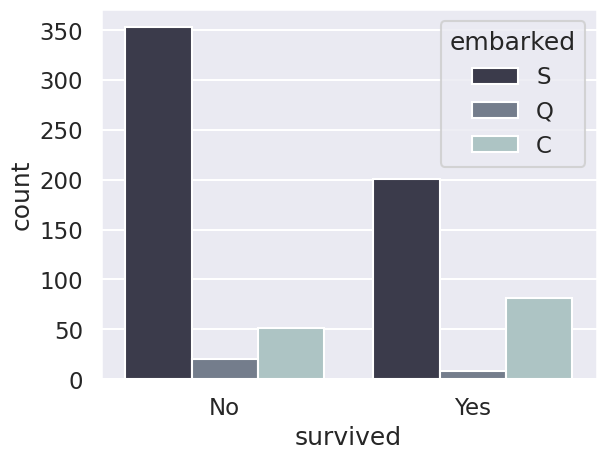

In [169]:
# xticks、目盛りの変更
sns.countplot(data=df, x='survived', hue='embarked', palette='bone')
plt.xticks([0, 1], ['No', 'Yes']) # No, Yesにメモリを変更
plt.show()

バープロット

基本的にカテゴリごとの平均値の違いを見比べるために用いる

/var/folders/7h/pvrr2skj31l3k_w_t4bj4q280000gn/T/ipykernel_49267/3419867967.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =df, x = 'embarked', y = 'age', palette= 'Set2')


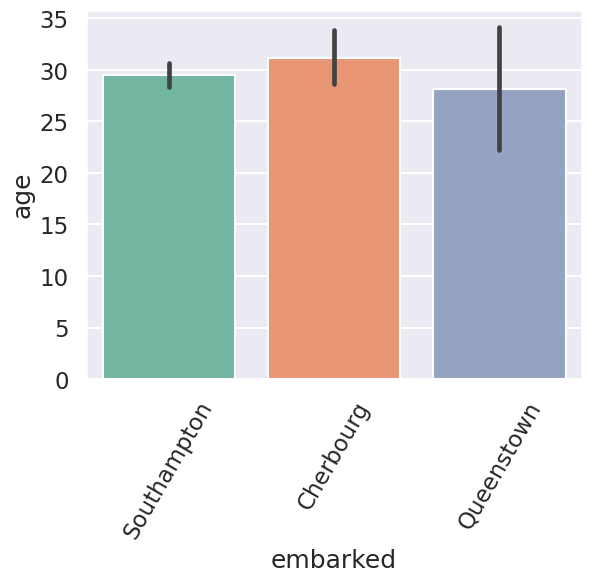

In [171]:
sns.barplot(data =df, x = 'embarked', y = 'age', palette= 'Set2')
# estimator:デフォルトは平均, np.std, np.median, np.var, np.cov(共分散)
plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'], rotation=60)
plt.show()
# d(=d)

# 黒い線がエラーバー(分散などを求めてたしからしさを計算しているらしい)
# 短いほどデータが多く、信頼性が高い

In [172]:
df.groupby('embarked')['age'].mean()

embarked
C    31.105455
Q    28.089286
S    29.445397
Name: age, dtype: float64

ボックスプロット

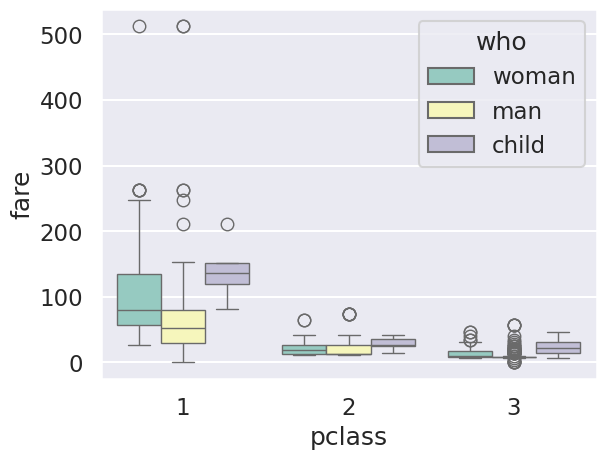

In [173]:
sns.boxplot(data=df, x='pclass', y='fare', hue='who', palette='Set3')
plt.show()

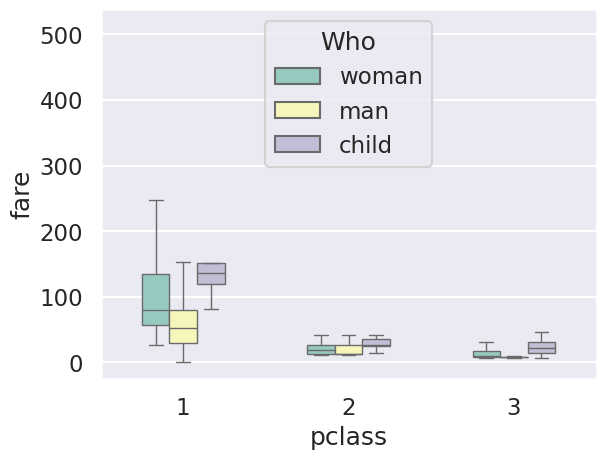

In [178]:
# # sym=''で外れ値の表示をなくすことができる（symbol）
# sns.boxplot(data=df, x='pclass', y='fare', hue='who', palette='Set3', sym='', width=0.5)
# plt.legend(loc='upper center', title='Who')
# plt.show()

# fliersize=0で外れ値の表示をなくすことができる
sns.boxplot(data=df, x='pclass', y='fare', hue='who', palette='Set3', fliersize=0, width=0.5)
plt.legend(loc='upper center', title='Who')
plt.show()

In [179]:
df.groupby(['pclass', 'who'])['fare'].describe()

count        mean        std      min         25%        50%  \
pclass who                                                                   
1      child    6.0  139.382633  43.666954  81.8583  120.000000  135.77500   
       man     98.0   69.714414  81.084213   0.0000   28.800000   51.93125   
       woman   82.0  106.006657  77.542322  25.9292   57.244800   80.00000   
2      child   19.0   28.323905   7.750054  14.5000   24.500000   26.25000   
       man     90.0   20.493842  15.059067  10.5000   12.612500   13.00000   
       woman   64.0   20.812175  11.013748  10.5000   13.000000   19.12500   
3      child   58.0   23.220190  11.365095   7.2250   13.676075   21.07500   
       man    225.0   10.227127   7.927257   0.0000    7.750000    7.89580   
       woman   72.0   14.563542   9.436050   6.7500    7.872950    9.83960   

                   75%       max  
pclass who                        
1      child  151.5500  211.3375  
       man     79.1125  512.3292  
       woman  134.5000  512.3292  
2      child   34.8750   41.5792  
       man     26.0000   73.5000  
       woman   26.0000   65.0000  
3      child   31.2750   46.9000  
       man      8.6625   56.4958  
       woman   17.5000   46.9000

バイオリンプロット

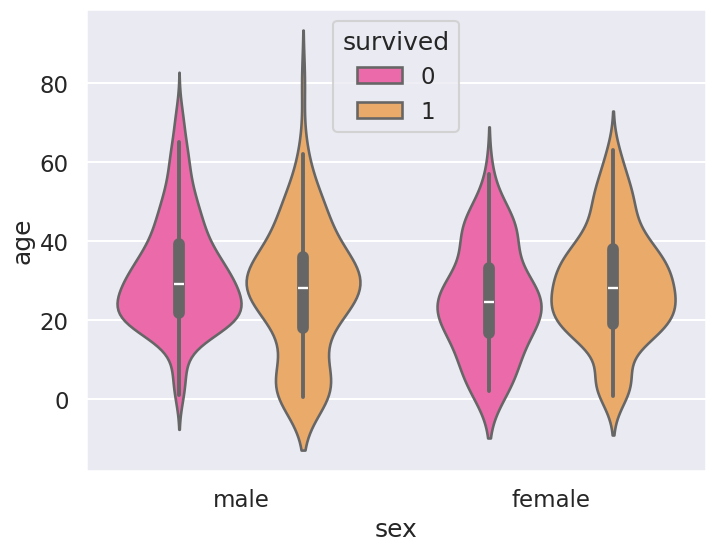

In [180]:
# combination of boxplot and kernel density estimate
# バイオリンの中には中央値、四分位範囲、最大値もしくは最小値もしくは外れ値との境界値が示されている
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='age', hue='survived', palette='spring')
plt.show()

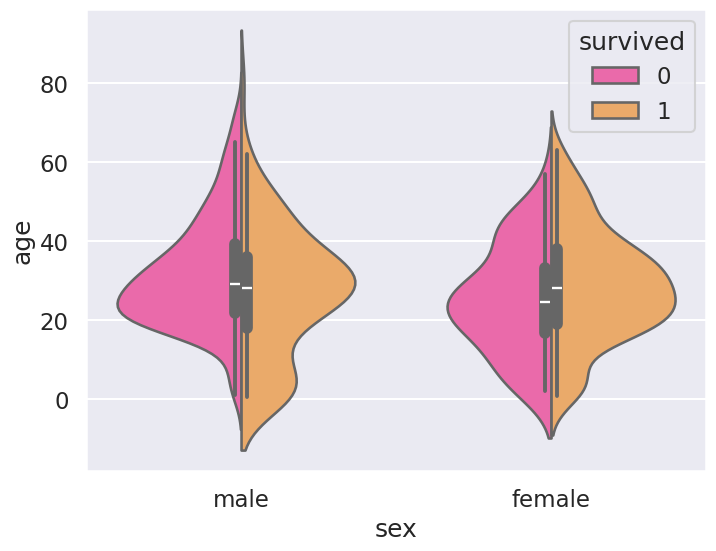

In [181]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='age', hue='survived', palette='spring', split=True)
plt.show()

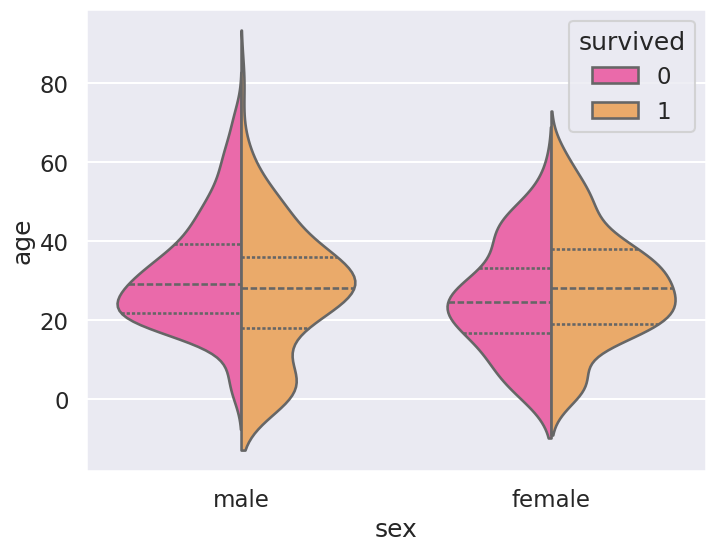

In [182]:
# inner='quartile'
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='age', hue='survived', palette='spring', split=True, inner='quartile')
plt.show()

スウォームプロット

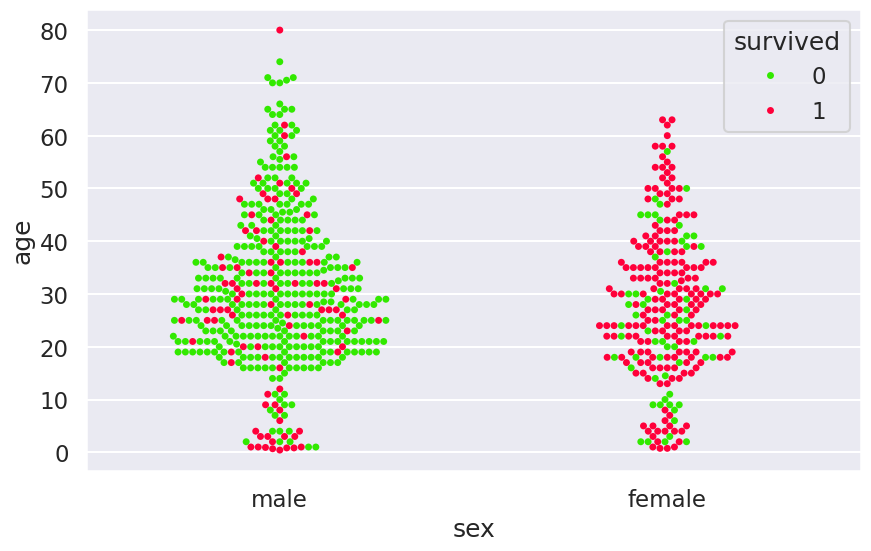

In [183]:
# swarm：群れ
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='sex', y='age', hue='survived', palette='prism')
plt.show()

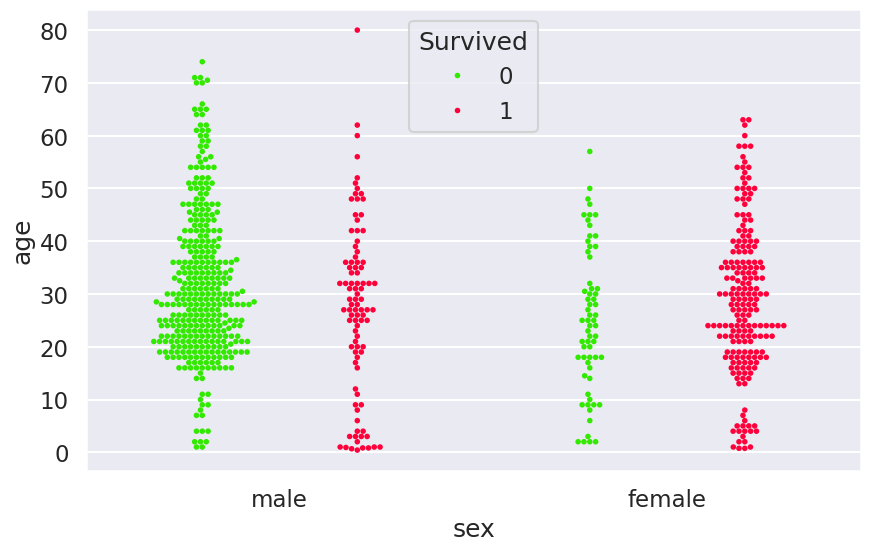

In [184]:
# dodge=True
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='sex', y='age', hue='survived', palette='prism', dodge=True, size=4)
plt.legend(loc='upper center', title='Survived')
plt.show()
# 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot. warnings.warn(msg, UserWarning)に対して, size=4での対応もできるがplt.figure(figsize=(15, 6))としてもよい